### File for creating "preceding  metrics" plots for predictions using the RF model I trained ...

7/8/2025

In [1]:
#relevant import statements
import numpy as np
import math
import pandas as pd
import xarray as xr 
import pickle 
import matplotlib.pyplot as plt

Open and pre-process ellipse metrics. 

In [2]:
##open ellipse metric files
infile = open("./data/ellipse/wind10_redo.p", 'rb') 
wind10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/size10_redo.p", 'rb') 
size10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/ratio10_redo.p", 'rb') 
rat10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/ephi10_redo.p", 'rb') 
ephi10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/cenlat10_redo.p", 'rb')
cenlat10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/cenlon10_redo.p", 'rb')
cenlon10 = pickle.load(infile)
infile.close()

infile = open("./data/gph/NA_gph_weightedANOM_500.p", 'rb') 
gph = pickle.load(infile)
infile.close()

infile = open("./data/pv/CAP_pvu_weightedANOM.p", 'rb') 
pv = pickle.load(infile)
infile.close()

In [3]:
wind10.shape

(63, 183)

In [4]:
#remove leap year
##CHANGE IF NOT EXTENDED DATAQ BACK TO 120
wind10 = np.delete(wind10[:62],[151],1)
rat10 = np.delete(rat10[:62],[151],1)
cenlat10 = np.delete(cenlat10[:62],[151],1)
cenlon10 = np.delete(cenlon10[:62],[151],1)
size10 = np.delete(size10[:62],[151],1)
ephi10 = np.delete(ephi10[:62],[151],1)

In [5]:
wind10.shape

(62, 182)

In [6]:
#remove NaNs
##CHANGE IF NOT EXTENDED DATA
indices = np.isnan(wind10)
for i in range(0,62):
    for j in range(0,182):
        if indices[i,j] != False:
            print(i)
            print(j)
            print("True")
            wind10[i,j] = 0
            rat10[i,j] = 0
            cenlat10[i,j] = 0
            cenlon10[i,j] = 0
            size10[i,j] = 0
            ephi10[i,j] = 0

0
0
True
0
1
True
0
2
True
0
3
True
0
4
True
0
5
True
0
6
True
0
7
True
0
8
True
0
9
True
0
10
True
0
11
True
1
0
True
1
1
True
1
2
True
1
3
True
1
4
True
1
5
True
1
168
True
1
172
True
1
173
True
1
174
True
1
175
True
1
176
True
1
177
True
1
178
True
1
179
True
1
180
True
1
181
True
2
0
True
2
1
True
2
2
True
2
3
True
2
4
True
2
5
True
2
6
True
2
7
True
2
8
True
2
9
True
3
0
True
3
1
True
3
2
True
3
3
True
3
4
True
3
5
True
3
6
True
3
7
True
3
8
True
3
9
True
4
0
True
4
1
True
4
2
True
4
3
True
4
4
True
4
5
True
4
6
True
4
7
True
4
8
True
4
9
True
4
10
True
4
11
True
4
172
True
4
173
True
4
174
True
4
175
True
4
176
True
4
177
True
4
178
True
4
179
True
4
180
True
4
181
True
5
0
True
5
1
True
5
2
True
5
3
True
5
4
True
5
5
True
5
6
True
5
7
True
5
8
True
5
9
True
5
10
True
5
11
True
6
0
True
6
1
True
6
2
True
6
3
True
6
4
True
6
5
True
6
6
True
6
157
True
7
0
True
7
1
True
7
2
True
7
3
True
7
4
True
7
5
True
7
6
True
8
0
True
8
1
True
8
2
True
8
3
True
8
4
True
8
5
True
8
6
True
8
7
T

In [7]:
input = np.empty((62,149,8))

In [8]:
input[:,:,0] = wind10[:,:149]
input[:,:,1] = rat10[:,:149]
input[:,:,2] = cenlat10[:,:149]
input[:,:,3] = cenlon10[:,:149]
input[:,:,4] = size10[:,:149]
input[:,:,5] = ephi10[:,:149]
input[:,:,6] = gph[:62,:149]
input[:,:,7] = pv[:62,:149]

In [9]:
input2 = np.empty((62,149,3))

In [10]:
input2[:,:,2] = wind10[:62,:149]
input2[:,:,1] = cenlon10[:62,:149]
input2[:,:,0] = size10[:62,:149]

Now that the assembly is done ... We can plot. lol.

In [11]:
##open indice files
infile = open("range_indices_RF14.p", 'rb') ##essentially just taking the ranges from the testing data (which is being plotted?)  
ranges = pickle.load(infile)
infile.close()

infile = open("posXtest_RF14.p", 'rb') 
posXtest = pickle.load(infile)
infile.close()

infile = open("FposXtest_RF14.p", 'rb') 
FposXtest = pickle.load(infile)
infile.close()

infile = open("negXtest_RF14.p", 'rb') 
negXtest = pickle.load(infile)
infile.close()

infile = open("FnegXtest_RF14.p", 'rb') 
FnegXtest = pickle.load(infile)
infile.close()

In [12]:
##reduce input to just the testing data
#nolag_Xtest = input[58:,:,:]
nolag_Xtest = input2[57:,:,:]
nolag_Xtest.shape

(5, 149, 3)

### The following few cells are if you would like to make a timeseries plot. 

### These few cells will be for making box plots instead lol. 

In [13]:
##Correct Positive Events
pos_corr_events = []
pos_corr_num = []
pos_corr_total_events = []

for i in range(0,5):
    for j in range(0,149):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(posXtest)):
            pos_index = posXtest[k]
            if pos_index == date_index:
                pos_corr_total_events.append(0)
                pos_corr_num.append(0)
                pos_corr_events.extend(nolag_Xtest[i,j,:])

##reshape
pos = np.array(pos_corr_events).reshape((len(pos_corr_num),1,3))
print(pos.shape)
print(len(pos_corr_total_events))
##A LOT OF THE CORRECT POSITIVE EVENTS ARE WITHIN 20 DAYS OF THE START OF THE YEAR

(7483, 1, 3)
7483


In [14]:
##FALSE Positive Events
Fpos_corr_events = []
Fpos_corr_num = []
Fpos_corr_total_events = []

for i in range(0,5):
    for j in range(0,149):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(FposXtest)):
            pos_index = FposXtest[k]
            if pos_index == date_index:
                Fpos_corr_total_events.append(0)
                Fpos_corr_num.append(0)
                Fpos_corr_events.extend(nolag_Xtest[i,j,:])
##reshape
Fpos = np.array(Fpos_corr_events).reshape((len(Fpos_corr_num),1,3))
print(Fpos.shape)
print(len(Fpos_corr_total_events))

(1377, 1, 3)
1377


In [15]:
##Correct Negative Events
neg_corr_events = []
neg_corr_num = []
neg_corr_total_events = []

for i in range(0,5):
    for j in range(0,149):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(negXtest)):
            neg_index = negXtest[k]
            if neg_index == date_index:
                neg_corr_total_events.append(0)
                neg_corr_num.append(0)
                neg_corr_events.extend(nolag_Xtest[i,j,:])
##reshape
neg = np.array(neg_corr_events).reshape((len(neg_corr_num),1,3))
print(neg.shape)
print(len(neg_corr_total_events))

(6123, 1, 3)
6123


In [16]:
##FALSE Negative Events
Fneg_corr_events = []
Fneg_corr_num = []
Fneg_corr_total_events = []

for i in range(0,5):
    for j in range(0,149):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(FnegXtest)):
            neg_index = FnegXtest[k]
            if neg_index == date_index:
                Fneg_corr_total_events.append(0)
                Fneg_corr_num.append(0)
                Fneg_corr_events.extend(nolag_Xtest[i,j,:])

##reshape
Fneg = np.array(Fneg_corr_events).reshape((len(Fneg_corr_num),1,3))
print(Fneg.shape)
print(len(Fneg_corr_total_events))

(0, 1, 3)
0


In [17]:
Fneg

array([], shape=(0, 1, 3), dtype=float64)

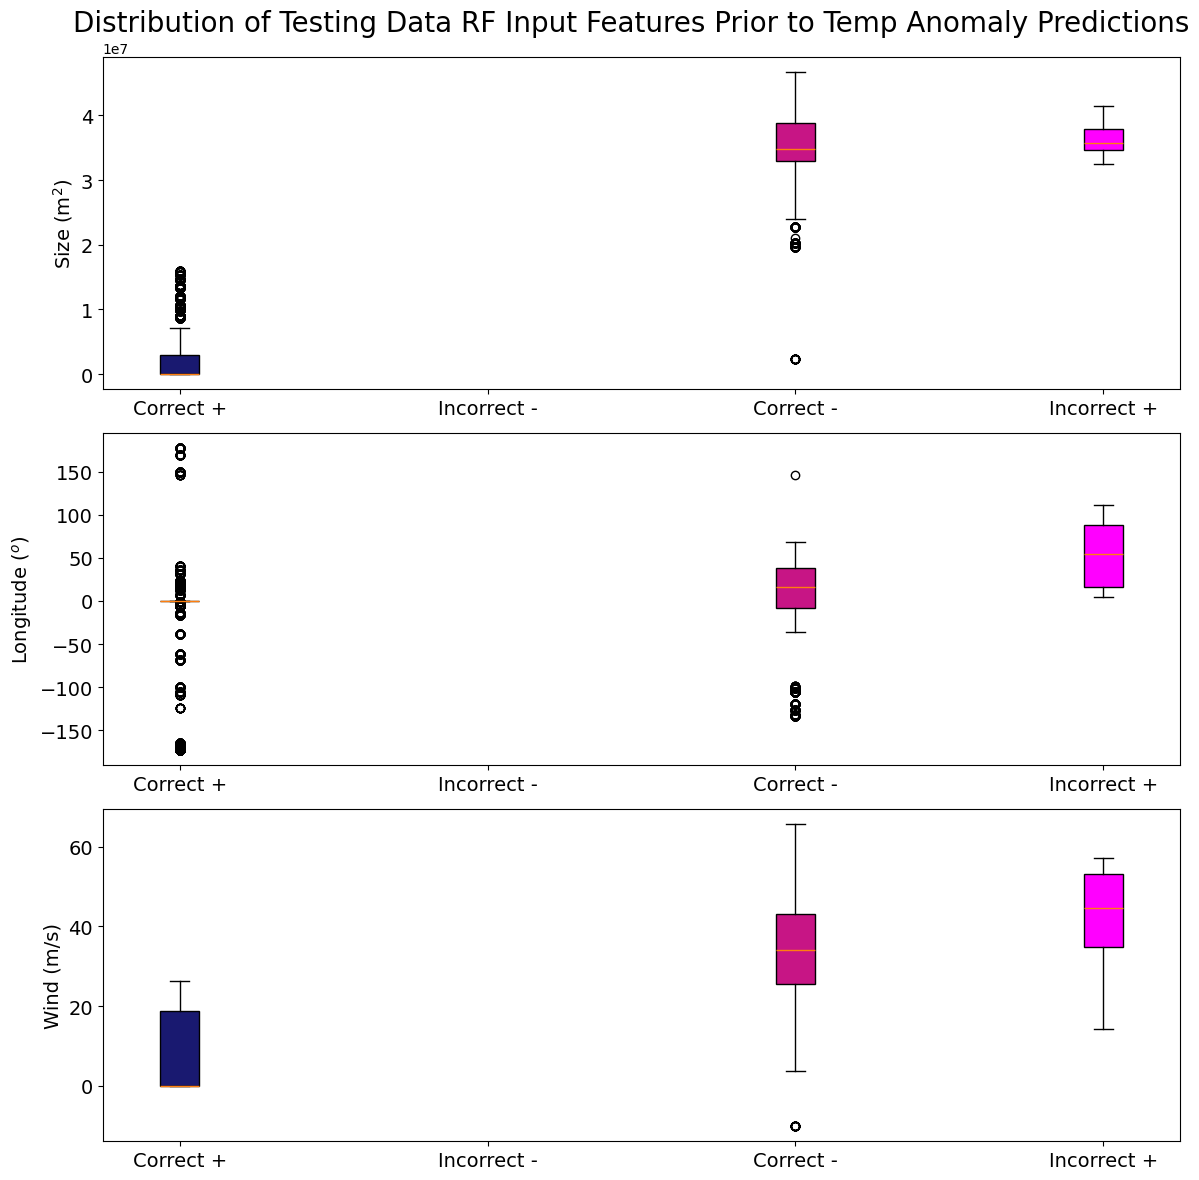

In [18]:
import matplotlib.ticker as mticker
myLocator = mticker.MultipleLocator(2)

#metrics = ["Wind (m/s)", "Ratio (m)", "Latitude ($^o$)", "Longitude ($^o$)", "Size (m$^2$)", "EPhi ($^o$)", "GPH (hPa)", "PV (m$^2$K/s kg)"]
metrics = ["Size (m$^2$)", "Longitude ($^o$)", "Wind (m/s)"]
ticks = ['Correct +', 'Incorrect -', 'Correct -', 'Incorrect +'] #set tick numbers for dataset
ind = [2, 4, 6, 8]  # the x locations for the groups
w = 0.25 #box-plot width
c = ["midnightblue","royalblue","mediumvioletred","magenta"]
fs = 14

fig, axes = plt.subplots(3, 1, figsize=(12, 12))
plt.suptitle("Distribution of Testing Data RF Input Features Prior to Temp Anomaly Predictions", fontsize = 20, x=0.53)
axes = axes.flatten()
for i in range(0,3):

    if i ==6:
        C_pos = pos[:,0,i]
        F_neg = Fneg[:,0,i]
        C_neg = neg[:,0,i]
        F_pos = Fpos[:,0,i]
        
        a1 =axes[i].boxplot([C_pos,F_neg,C_neg,F_pos], positions= [2,4,6,8], widths=w, patch_artist=True)
        for bplot in (a1,):
            for patch, color in zip(bplot['boxes'], c):
                patch.set_facecolor(color)
        axes[i].set_xticks(ind, ticks, fontsize = 14)
        axes[i].set_ylabel(str(metrics[i]), fontsize = fs)
        #axes[i].set_ylim(0,1)
    else:
        C_pos = pos[:,0,i]
        F_neg = Fneg[:,0,i]
        C_neg = neg[:,0,i]
        F_pos = Fpos[:,0,i]
        
        a1 =axes[i].boxplot([C_pos,F_neg,C_neg,F_pos], positions= [2,4,6,8], widths=w, patch_artist=True)
        for bplot in (a1,):
            for patch, color in zip(bplot['boxes'], c):
                patch.set_facecolor(color)
        axes[i].set_xticks(ind, ticks, fontsize = 14)
        axes[i].set_ylabel(str(metrics[i]), fontsize = 14)
        axes[i].tick_params(axis='both', labelsize=14)

        #axes[i].set_ylim(0,1)
    

plt.tight_layout()
plt.subplots_adjust(top=0.94)   
#plt.savefig("RF_features_beforePRED_BOXPLOT_14days.png")
plt.show()